# Data Transformation and Cleaning Masterclass 🧹📊

## A Comprehensive Learning Journey for Data Science and Analysis

Welcome to this comprehensive learning document for transforming and cleaning data using Python! This notebook will take you from basic concepts to advanced techniques used in professional Data Science and Data Analysis workflows.

### 🎯 Learning Objectives
By the end of this masterclass, you will be able to:
- Identify and handle common data quality issues
- Transform data into analysis-ready formats
- Apply appropriate cleaning techniques for different data types
- Build robust data preprocessing pipelines
- Handle real-world messy datasets with confidence

### 📚 Course Structure
This notebook is organized into progressive modules:

1. **Foundation** - Basic concepts and setup
2. **Data Inspection & Understanding** - Getting to know your data
3. **Missing Data Mastery** - Handling incomplete information
4. **Data Type Transformations** - Converting and standardizing formats
5. **Duplicate Detection & Removal** - Ensuring data uniqueness
6. **Text Data Cleaning** - Working with strings and text
7. **Outlier Detection & Treatment** - Identifying and handling anomalies
8. **Data Transformation Techniques** - Scaling, encoding, and feature engineering
9. **Data Reshaping & Aggregation** - Restructuring data for analysis
10. **Advanced Topics** - Time series, large datasets, and automation
11. **Real-World Case Studies** - Putting it all together

### 💡 How to Use This Notebook
- Run each cell sequentially to build understanding
- Experiment with the provided examples
- Try the practice exercises at the end of each section
- Reference back to sections as needed during your data science projects

Let's begin our journey into the world of data transformation and cleaning!


# 1. Foundation 🏗️

## Essential Libraries and Concepts

Before we dive into data cleaning, let's establish our foundation with the essential libraries and understand what makes data "dirty" or "messy."


In [1]:
# Import essential libraries for data cleaning and transformation
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
import scipy.stats as stats

# Configuration for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Print library versions for reproducibility
print("📦 Library Versions:")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {matplotlib.__version__}")  # Fixed: use matplotlib.__version__ instead of plt.__version__
print(f"seaborn: {sns.__version__}")

print("\n✅ Foundation libraries loaded successfully!")


📦 Library Versions:
pandas: 2.3.0
numpy: 2.2.6
matplotlib: 3.10.3
seaborn: 0.13.2

✅ Foundation libraries loaded successfully!


## Understanding Data Quality Issues

Real-world data is rarely perfect. Let's understand the common types of data quality problems we encounter:


In [2]:
# Create a sample "messy" dataset to demonstrate common data quality issues
np.random.seed(42)

# Generate synthetic messy data
messy_data = {
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'name': ['John Doe', 'jane smith', 'MIKE JONES', 'Sarah Wilson', 'john doe', 
             'Bob Brown', None, 'Alice Johnson', 'Tom Davis', 'jane smith',
             'Lisa Miller', 'David Lee', 'Emma White', 'Chris Black', 'Anna Green'],
    'email': ['john@email.com', 'Jane@Email.Com', 'mike@email.com', 'sarah@invalid',
              'john@email.com', 'bob@email.com', 'missing@email.com', 'alice@email.com',
              'tom@email.com', 'Jane@Email.Com', '', 'david@email.com', 
              'emma@email.com', 'chris@email.com', np.nan],
    'age': [25, 30, None, 22, 25, 35, 28, 150, 29, 30, 32, 27, 24, 31, 26],
    'salary': [50000, 60000, 70000, None, 50000, 80000, 55000, 90000, 65000, 
               60000, 75000, 58000, 52000, 67000, 54000],
    'department': ['Sales', 'marketing', 'ENGINEERING', 'Sales', 'Sales', 
                   'Engineering', 'Marketing', 'sales', 'Engineering', 'marketing',
                   'HR', 'Engineering', 'Sales', 'Marketing', 'HR'],
    'join_date': ['2020-01-15', '2021/03/10', '2019-12-01', '2022-06-15', '2020-01-15',
                  '2021-08-20', '2020-11-05', 'invalid_date', '2021-05-10', '2021/03/10',
                  '2022-01-30', '2020-09-12', '2021-11-25', '2022-04-18', '2020-07-08'],
    'performance_score': [85.5, 92.0, 78.5, None, 85.5, 95.0, 88.5, 72.0, 91.5, 92.0,
                          89.0, 87.5, 83.0, 90.5, 86.0]
}

# Create DataFrame
df_messy = pd.DataFrame(messy_data)

print("🔍 Sample Messy Dataset:")
print("=" * 50)
print(df_messy)

print("\n📊 Data Info:")
print("=" * 30)
print(df_messy.info())

print("\n🚨 Data Quality Issues Present:")
print("=" * 40)
print("• Missing values (None, NaN, empty strings)")
print("• Inconsistent formatting (case variations)")
print("• Duplicate records")
print("• Invalid data (age = 150, invalid email formats)")
print("• Inconsistent date formats") 
print("• Data type issues")
print("• Inconsistent categorical values")


🔍 Sample Messy Dataset:
    customer_id           name              email    age   salary  \
0             1       John Doe     john@email.com   25.0  50000.0   
1             2     jane smith     Jane@Email.Com   30.0  60000.0   
2             3     MIKE JONES     mike@email.com    NaN  70000.0   
3             4   Sarah Wilson      sarah@invalid   22.0      NaN   
4             5       john doe     john@email.com   25.0  50000.0   
5             6      Bob Brown      bob@email.com   35.0  80000.0   
6             7           None  missing@email.com   28.0  55000.0   
7             8  Alice Johnson    alice@email.com  150.0  90000.0   
8             9      Tom Davis      tom@email.com   29.0  65000.0   
9            10     jane smith     Jane@Email.Com   30.0  60000.0   
10           11    Lisa Miller                      32.0  75000.0   
11           12      David Lee    david@email.com   27.0  58000.0   
12           13     Emma White     emma@email.com   24.0  52000.0   
13        

# 2. Data Inspection & Understanding 🔍

## Getting to Know Your Data

The first step in any data cleaning process is understanding what you're working with. Let's explore various techniques to inspect and understand our dataset.


In [3]:
# Comprehensive data inspection toolkit

def comprehensive_data_inspection(df, sample_size=5):
    """
    Perform a comprehensive inspection of a DataFrame
    
    Parameters:
    df (pd.DataFrame): The DataFrame to inspect
    sample_size (int): Number of sample rows to display
    """
    print("🔍 COMPREHENSIVE DATA INSPECTION REPORT")
    print("=" * 60)
    
    # 1. Basic Information
    print(f"\n📏 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # 2. Column Information
    print(f"\n📋 Column Information:")
    print("-" * 30)
    for i, col in enumerate(df.columns, 1):
        dtype = df[col].dtype
        null_count = df[col].isnull().sum()
        null_pct = (null_count / len(df)) * 100
        unique_count = df[col].nunique()
        print(f"{i:2d}. {col:<20} | {str(dtype):<12} | Nulls: {null_count:3d} ({null_pct:5.1f}%) | Unique: {unique_count}")
    
    # 3. Sample Data
    print(f"\n📄 First {sample_size} rows:")
    print("-" * 30)
    display(df.head(sample_size))
    
    print(f"\n📄 Last {sample_size} rows:")
    print("-" * 30)
    display(df.tail(sample_size))
    
    # 4. Statistical Summary
    print(f"\n📊 Statistical Summary:")
    print("-" * 30)
    display(df.describe(include='all'))
    
    # 5. Missing Data Analysis
    print(f"\n❌ Missing Data Analysis:")
    print("-" * 30)
    missing_data = df.isnull().sum()
    missing_pct = (missing_data / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percentage': missing_pct
    }).sort_values('Missing Count', ascending=False)
    display(missing_summary[missing_summary['Missing Count'] > 0])
    
    # 6. Data Types Issues
    print(f"\n⚠️  Potential Data Type Issues:")
    print("-" * 30)
    for col in df.columns:
        if df[col].dtype == 'object':
            # Check for numeric values stored as strings
            sample_values = df[col].dropna().astype(str).head(10).tolist()
            print(f"{col}: {sample_values}")
    
    return missing_summary

# Run comprehensive inspection on our messy dataset
missing_analysis = comprehensive_data_inspection(df_messy)


🔍 COMPREHENSIVE DATA INSPECTION REPORT

📏 Dataset Shape: 15 rows × 8 columns
💾 Memory Usage: 0.00 MB

📋 Column Information:
------------------------------
 1. customer_id          | int64        | Nulls:   0 (  0.0%) | Unique: 15
 2. name                 | object       | Nulls:   1 (  6.7%) | Unique: 13
 3. email                | object       | Nulls:   1 (  6.7%) | Unique: 12
 4. age                  | float64      | Nulls:   1 (  6.7%) | Unique: 12
 5. salary               | float64      | Nulls:   1 (  6.7%) | Unique: 12
 6. department           | object       | Nulls:   0 (  0.0%) | Unique: 7
 7. join_date            | object       | Nulls:   0 (  0.0%) | Unique: 13
 8. performance_score    | float64      | Nulls:   1 (  6.7%) | Unique: 12

📄 First 5 rows:
------------------------------


,customer_id,name,email,age,salary,department,join_date,performance_score
0,1,John Doe,john@email.com,25.0,50000.0,Sales,2020-01-15,85.5
1,2,jane smith,Jane@Email.Com,30.0,60000.0,marketing,2021/03/10,92.0
2,3,MIKE JONES,mike@email.com,NaN,70000.0,ENGINEERING,2019-12-01,78.5
3,4,Sarah Wilson,sarah@invalid,22.0,NaN,Sales,2022-06-15,NaN
4,5,john doe,john@email.com,25.0,50000.0,Sales,2020-01-15,85.5



📄 Last 5 rows:
------------------------------


,customer_id,name,email,age,salary,department,join_date,performance_score
10,11,Lisa Miller,,32.0,75000.0,HR,2022-01-30,89.0
11,12,David Lee,david@email.com,27.0,58000.0,Engineering,2020-09-12,87.5
12,13,Emma White,emma@email.com,24.0,52000.0,Sales,2021-11-25,83.0
13,14,Chris Black,chris@email.com,31.0,67000.0,Marketing,2022-04-18,90.5
14,15,Anna Green,NaN,26.0,54000.0,HR,2020-07-08,86.0



📊 Statistical Summary:
------------------------------


,customer_id,name,email,age,salary,department,join_date,performance_score
count,15.000000,14,14,14.000000,14.000000,15,15,14.000000
unique,NaN,13,12,NaN,NaN,7,13,NaN
top,NaN,jane smith,john@email.com,NaN,NaN,Sales,2020-01-15,NaN
freq,NaN,2,2,NaN,NaN,4,2,NaN
mean,8.000000,NaN,NaN,36.714286,63285.714286,NaN,NaN,86.892857
std,4.472136,NaN,NaN,32.791717,12015.557681,NaN,NaN,6.022964
min,1.000000,NaN,NaN,22.000000,50000.000000,NaN,NaN,72.000000
25%,4.500000,NaN,NaN,25.250000,54250.000000,NaN,NaN,85.500000
50%,8.000000,NaN,NaN,28.500000,60000.000000,NaN,NaN,88.000000
75%,11.500000,NaN,NaN,30.750000,69250.000000,NaN,NaN,91.250000



❌ Missing Data Analysis:
------------------------------


,Missing Count,Missing Percentage
name,1,6.666667
email,1,6.666667
age,1,6.666667
salary,1,6.666667
performance_score,1,6.666667



⚠️  Potential Data Type Issues:
------------------------------
name: ['John Doe', 'jane smith', 'MIKE JONES', 'Sarah Wilson', 'john doe', 'Bob Brown', 'Alice Johnson', 'Tom Davis', 'jane smith', 'Lisa Miller']
email: ['john@email.com', 'Jane@Email.Com', 'mike@email.com', 'sarah@invalid', 'john@email.com', 'bob@email.com', 'missing@email.com', 'alice@email.com', 'tom@email.com', 'Jane@Email.Com']
department: ['Sales', 'marketing', 'ENGINEERING', 'Sales', 'Sales', 'Engineering', 'Marketing', 'sales', 'Engineering', 'marketing']
join_date: ['2020-01-15', '2021/03/10', '2019-12-01', '2022-06-15', '2020-01-15', '2021-08-20', '2020-11-05', 'invalid_date', '2021-05-10', '2021/03/10']


📊 Data Quality Visualization:


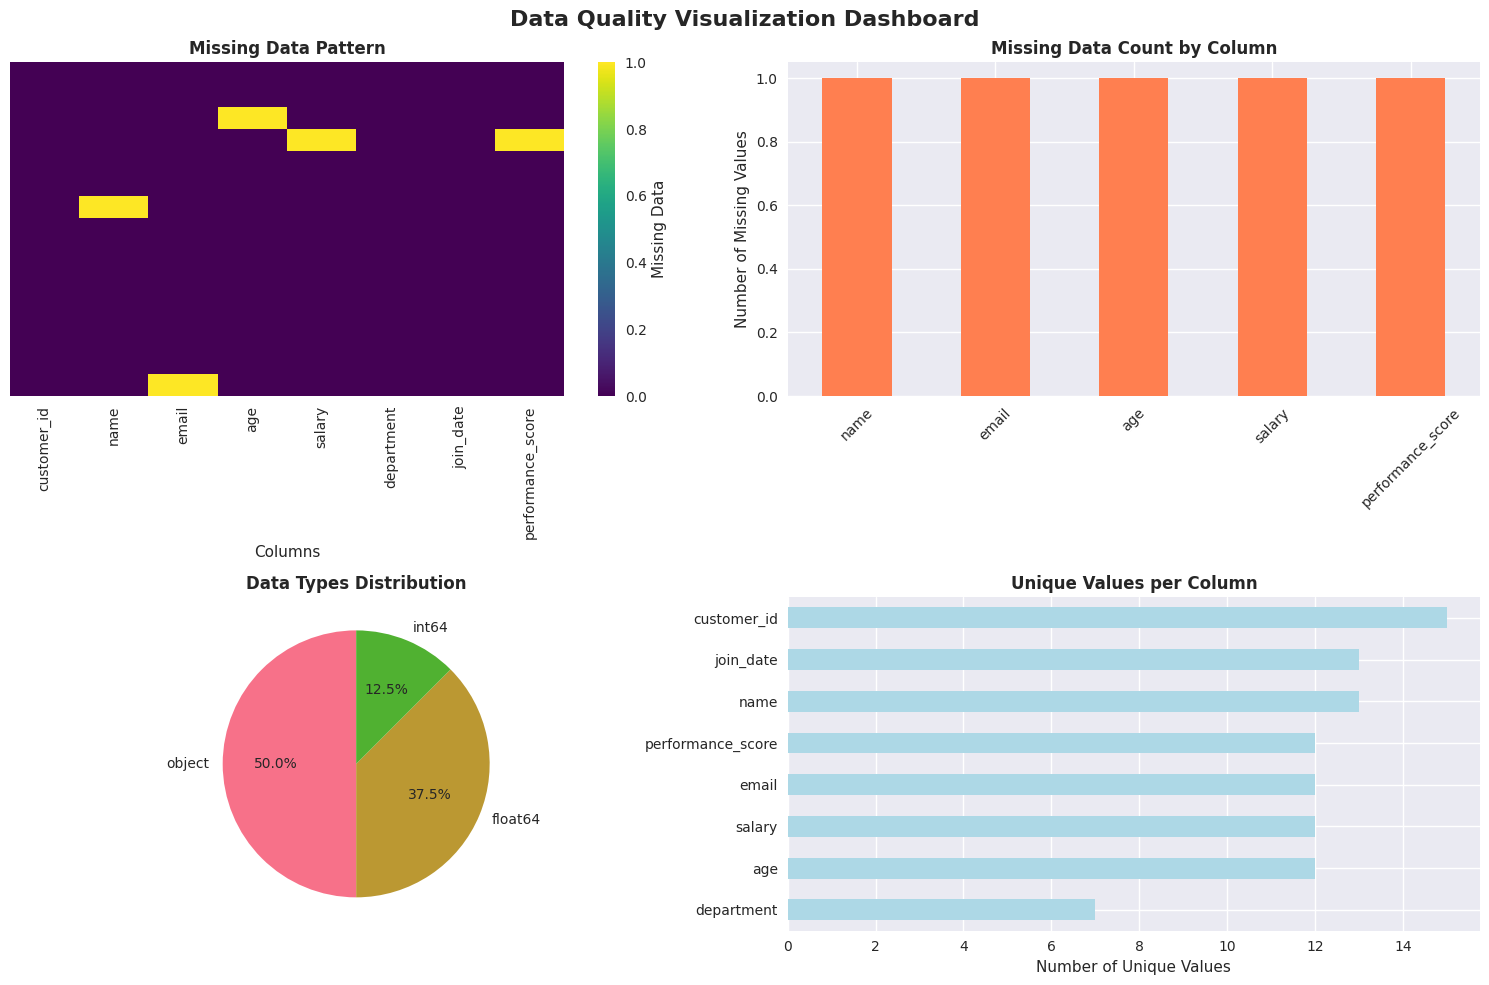

In [4]:
# Visual inspection techniques

def visualize_data_quality(df):
    """Create visualizations to understand data quality issues"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Data Quality Visualization Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Missing Data Heatmap
    ax1 = axes[0, 0]
    sns.heatmap(df.isnull(), cbar=True, ax=ax1, cmap='viridis', 
                yticklabels=False, cbar_kws={'label': 'Missing Data'})
    ax1.set_title('Missing Data Pattern', fontweight='bold')
    ax1.set_xlabel('Columns')
    
    # 2. Missing Data Bar Chart
    ax2 = axes[0, 1]
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
    if len(missing_counts) > 0:
        missing_counts.plot(kind='bar', ax=ax2, color='coral')
        ax2.set_title('Missing Data Count by Column', fontweight='bold')
        ax2.set_ylabel('Number of Missing Values')
        ax2.tick_params(axis='x', rotation=45)
    
    # 3. Data Types Distribution
    ax3 = axes[1, 0]
    dtype_counts = df.dtypes.value_counts()
    dtype_counts.plot(kind='pie', ax=ax3, autopct='%1.1f%%', startangle=90)
    ax3.set_title('Data Types Distribution', fontweight='bold')
    ax3.set_ylabel('')
    
    # 4. Unique Values per Column
    ax4 = axes[1, 1]
    unique_counts = df.nunique().sort_values(ascending=True)
    unique_counts.plot(kind='barh', ax=ax4, color='lightblue')
    ax4.set_title('Unique Values per Column', fontweight='bold')
    ax4.set_xlabel('Number of Unique Values')
    
    plt.tight_layout()
    plt.show()

# Visualize our messy data quality
print("📊 Data Quality Visualization:")
print("=" * 40)
visualize_data_quality(df_messy)


# 3. Missing Data Mastery 🕳️

## Handling Incomplete Information

Missing data is one of the most common challenges in data science. Let's explore different strategies for identifying and handling missing values.


In [5]:
# Step 1: Identify different types of missing values
print("🔍 IDENTIFYING MISSING VALUES")
print("=" * 50)

# Create a copy of our messy data for missing value analysis
df_missing = df_messy.copy()

# Replace empty strings with NaN for consistent handling
df_missing = df_missing.replace('', np.nan)

print("Original missing value patterns:")
print("-" * 35)
for col in df_missing.columns:
    total_missing = df_missing[col].isnull().sum()
    if total_missing > 0:
        print(f"{col}: {total_missing} missing values")
        # Show unique patterns of missing data
        missing_mask = df_missing[col].isnull()
        print(f"  Indices with missing data: {df_missing[missing_mask].index.tolist()}")
        print()

# Advanced missing value detection
def detect_missing_patterns(df):
    """Detect various patterns of missing data"""
    
    patterns = {}
    
    # 1. Explicit missing values (NaN, None)
    explicit_missing = df.isnull().sum()
    patterns['explicit'] = explicit_missing[explicit_missing > 0]
    
    # 2. Implicit missing values (empty strings, specific values)
    implicit_missing = {}
    for col in df.select_dtypes(include=['object']).columns:
        # Count empty strings
        empty_strings = (df[col] == '').sum()
        # Count placeholder values
        placeholder_values = df[col].isin(['N/A', 'n/a', 'NULL', 'null', 'missing', 'Missing']).sum()
        
        if empty_strings > 0 or placeholder_values > 0:
            implicit_missing[col] = {
                'empty_strings': empty_strings,
                'placeholders': placeholder_values
            }
    
    patterns['implicit'] = implicit_missing
    
    # 3. Pattern-based missing (e.g., all missing together)
    # Find columns that tend to be missing together
    missing_combinations = {}
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                both_missing = ((df[col1].isnull()) & (df[col2].isnull())).sum()
                if both_missing > 0:
                    key = tuple(sorted([col1, col2]))
                    if key not in missing_combinations:
                        missing_combinations[key] = both_missing
    
    patterns['combinations'] = missing_combinations
    
    return patterns

# Analyze missing patterns
missing_patterns = detect_missing_patterns(df_missing)

print("🎯 Missing Value Patterns Analysis:")
print("-" * 35)
print(f"Explicit missing (NaN/None): {dict(missing_patterns['explicit'])}")
print(f"Implicit missing: {missing_patterns['implicit']}")
print(f"Combined missing patterns: {missing_patterns['combinations']}")


🔍 IDENTIFYING MISSING VALUES
Original missing value patterns:
-----------------------------------
name: 1 missing values
  Indices with missing data: [6]

email: 2 missing values
  Indices with missing data: [10, 14]

age: 1 missing values
  Indices with missing data: [2]

salary: 1 missing values
  Indices with missing data: [3]

performance_score: 1 missing values
  Indices with missing data: [3]

🎯 Missing Value Patterns Analysis:
-----------------------------------
Explicit missing (NaN/None): {'name': np.int64(1), 'email': np.int64(2), 'age': np.int64(1), 'salary': np.int64(1), 'performance_score': np.int64(1)}
Implicit missing: {}
Combined missing patterns: {('performance_score', 'salary'): np.int64(1)}


In [6]:
# Step 2: Missing Value Treatment Strategies

print("🛠️ MISSING VALUE TREATMENT STRATEGIES")
print("=" * 50)

# Strategy 1: Deletion Methods
print("1️⃣ DELETION METHODS")
print("-" * 25)

# Remove rows with any missing values
df_drop_any = df_missing.dropna()
print(f"Original shape: {df_missing.shape}")
print(f"After dropping rows with ANY missing: {df_drop_any.shape}")

# Remove rows with all missing values
df_drop_all = df_missing.dropna(how='all')
print(f"After dropping rows with ALL missing: {df_drop_all.shape}")

# Remove rows with missing values in specific columns
df_drop_subset = df_missing.dropna(subset=['age', 'salary'])
print(f"After dropping rows with missing age OR salary: {df_drop_subset.shape}")

# Remove columns with too many missing values (>50%)
threshold = len(df_missing) * 0.5  # 50% threshold
df_drop_cols = df_missing.dropna(axis=1, thresh=threshold)
print(f"After dropping columns with >50% missing: {df_drop_cols.shape}")
print()

# Strategy 2: Simple Imputation
print("2️⃣ SIMPLE IMPUTATION METHODS")
print("-" * 30)

df_imputed = df_missing.copy()

# Numerical columns: Mean, Median, Mode
numerical_cols = df_imputed.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    if df_imputed[col].isnull().sum() > 0:
        # Calculate different measures
        mean_val = df_imputed[col].mean()
        median_val = df_imputed[col].median()
        mode_val = df_imputed[col].mode().iloc[0] if not df_imputed[col].mode().empty else mean_val
        
        print(f"{col}:")
        print(f"  Mean: {mean_val:.2f}, Median: {median_val:.2f}, Mode: {mode_val:.2f}")
        
        # Use median for robust imputation (less sensitive to outliers)
        df_imputed[col].fillna(median_val, inplace=True)
        print(f"  → Filled with median: {median_val:.2f}")

# Categorical columns: Mode or 'Unknown'
categorical_cols = df_imputed.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df_imputed[col].isnull().sum() > 0:
        mode_val = df_imputed[col].mode().iloc[0] if not df_imputed[col].mode().empty else 'Unknown'
        
        print(f"{col}:")
        print(f"  Mode: {mode_val}")
        
        # Fill with mode
        df_imputed[col].fillna(mode_val, inplace=True)
        print(f"  → Filled with mode: {mode_val}")

print(f"\nMissing values after simple imputation:")
print(df_imputed.isnull().sum().sum())


🛠️ MISSING VALUE TREATMENT STRATEGIES
1️⃣ DELETION METHODS
-------------------------
Original shape: (15, 8)
After dropping rows with ANY missing: (10, 8)
After dropping rows with ALL missing: (15, 8)
After dropping rows with missing age OR salary: (13, 8)
After dropping columns with >50% missing: (15, 8)

2️⃣ SIMPLE IMPUTATION METHODS
------------------------------
age:
  Mean: 36.71, Median: 28.50, Mode: 25.00
  → Filled with median: 28.50
salary:
  Mean: 63285.71, Median: 60000.00, Mode: 50000.00
  → Filled with median: 60000.00
performance_score:
  Mean: 86.89, Median: 88.00, Mode: 85.50
  → Filled with median: 88.00
name:
  Mode: jane smith
  → Filled with mode: jane smith
email:
  Mode: Jane@Email.Com
  → Filled with mode: Jane@Email.Com

Missing values after simple imputation:
0


In [7]:
# Strategy 3: Advanced Imputation Techniques
print("3️⃣ ADVANCED IMPUTATION METHODS")
print("-" * 35)

# Forward Fill and Backward Fill (for time series or ordered data)
df_ffill = df_missing.copy().sort_values('customer_id')
print("Forward Fill (use previous value):")
df_ffill_demo = df_ffill[['customer_id', 'age', 'salary']].copy()
df_ffill_demo['age_ffill'] = df_ffill_demo['age'].fillna(method='ffill')
df_ffill_demo['salary_ffill'] = df_ffill_demo['salary'].fillna(method='ffill')
print(df_ffill_demo)

print("\nBackward Fill (use next value):")
df_bfill_demo = df_ffill[['customer_id', 'age', 'salary']].copy()
df_bfill_demo['age_bfill'] = df_bfill_demo['age'].fillna(method='bfill')
df_bfill_demo['salary_bfill'] = df_bfill_demo['salary'].fillna(method='bfill')
print(df_bfill_demo)

# Interpolation (for numerical data)
print("\nInterpolation (estimate values between known points):")
df_interp = df_missing[['customer_id', 'age', 'salary']].copy().sort_values('customer_id')
df_interp['age_interpolated'] = df_interp['age'].interpolate()
df_interp['salary_interpolated'] = df_interp['salary'].interpolate()
print(df_interp)

# KNN Imputation (using similar records)
print("\n🧠 KNN Imputation (using similar records):")
print("-" * 45)

# Prepare data for KNN imputation (only numerical columns)
numerical_data = df_missing[['age', 'salary', 'performance_score']].copy()

# KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)
numerical_imputed = knn_imputer.fit_transform(numerical_data)

# Create DataFrame with imputed values
df_knn = df_missing.copy()
df_knn[['age', 'salary', 'performance_score']] = numerical_imputed

print("Before KNN imputation:")
print(df_missing[['customer_id', 'age', 'salary', 'performance_score']].head(10))

print("\nAfter KNN imputation:")
print(df_knn[['customer_id', 'age', 'salary', 'performance_score']].head(10))

# Compare different imputation strategies
print("\n📊 IMPUTATION STRATEGY COMPARISON")
print("-" * 40)

strategies = {
    'Original': df_missing['age'].copy(),
    'Mean': df_missing['age'].fillna(df_missing['age'].mean()),
    'Median': df_missing['age'].fillna(df_missing['age'].median()),
    'KNN': df_knn['age'].copy()
}

comparison_df = pd.DataFrame(strategies)
print("Age column comparison:")
print(comparison_df.head(10))

print("\nStatistical differences:")
for strategy, values in strategies.items():
    if strategy != 'Original':
        print(f"{strategy}: Mean={values.mean():.2f}, Std={values.std():.2f}")


3️⃣ ADVANCED IMPUTATION METHODS
-----------------------------------
Forward Fill (use previous value):
    customer_id    age   salary  age_ffill  salary_ffill
0             1   25.0  50000.0       25.0       50000.0
1             2   30.0  60000.0       30.0       60000.0
2             3    NaN  70000.0       30.0       70000.0
3             4   22.0      NaN       22.0       70000.0
4             5   25.0  50000.0       25.0       50000.0
5             6   35.0  80000.0       35.0       80000.0
6             7   28.0  55000.0       28.0       55000.0
7             8  150.0  90000.0      150.0       90000.0
8             9   29.0  65000.0       29.0       65000.0
9            10   30.0  60000.0       30.0       60000.0
10           11   32.0  75000.0       32.0       75000.0
11           12   27.0  58000.0       27.0       58000.0
12           13   24.0  52000.0       24.0       52000.0
13           14   31.0  67000.0       31.0       67000.0
14           15   26.0  54000.0       26.0

## 📋 Practice Exercise: Missing Data

**Challenge**: Create a dataset with intentional missing values and apply different imputation strategies. Compare the results and determine which strategy works best for different scenarios.

**Your Task**:
1. Create a synthetic dataset with missing values
2. Apply at least 3 different imputation strategies
3. Evaluate the impact on data distribution
4. Choose the best strategy and justify your choice


In [9]:
# Create a synthetic dataset with intentional missing values
np.random.seed(42)  # For reproducibility

# Generate random data
n_samples = 100

# Create mock data with realistic ranges and distributions
data = {
    'employee_id': range(1, n_samples + 1),
    'age': np.random.normal(35, 8, n_samples).astype(int),  # Ages centered around 35
    'salary': np.random.normal(60000, 15000, n_samples),    # Salaries centered around 60k
    'years_experience': np.random.normal(8, 4, n_samples),   # Experience centered around 8 years
    'performance_rating': np.random.normal(7.5, 1.5, n_samples)  # Ratings from 0-10
}

# Create DataFrame
df_copy = pd.DataFrame(data)

# Ensure realistic bounds
df_copy['age'] = df_copy['age'].clip(22, 65)  # Reasonable age range
df_copy['salary'] = df_copy['salary'].clip(30000, 120000)  # Reasonable salary range
df_copy['years_experience'] = df_copy['years_experience'].clip(0, 40)  # Max 40 years experience
df_copy['performance_rating'] = df_copy['performance_rating'].clip(1, 10)  # Rating between 1-10

# Add categorical data
departments = ['Sales', 'Marketing', 'Engineering', 'HR', 'Finance']
education = ['Bachelor', 'Master', 'PhD', 'High School']

df_copy['department'] = np.random.choice(departments, n_samples)
df_copy['education'] = np.random.choice(education, n_samples)

# Introduce missing values randomly (approximately 10% of data)
for column in ['age', 'salary', 'years_experience', 'performance_rating', 'department', 'education']:
    mask = np.random.random(n_samples) < 0.1  # 10% missing rate
    df_copy.loc[mask, column] = np.nan


In [ ]:
# Data Inspection

rows = df_copy.shape[0]
cols = df_copy.shape[1]
memory = df_copy.memory_usage(deep=True).sum() / 1024**2

print(f"Rows: {rows}")
print(f"Columns: {cols}")
print(f"Memory: {memory:.2f} MB")

print('='*50)

print(df_copy.info())

print('='*50)

print(df_copy.describe())

print('='*50)

# Column null counts and percentage
for col in df_copy.columns:
    null_count = df_copy[col].isnull().sum()
    null_percentage = null_count / len(df_copy)
    print(f"{col}: {null_count} nulls ({null_percentage:.2%})")

print('='*50)

# Display first 5 rows of the dataframe
print(df_copy.head())

print('='*50)

# Display last 5 rows of the dataframe
print(df_copy.tail())


In [24]:
# Handling Missing Values

df_copy = df_copy.copy()

df_copy.replace('', np.nan)

#fill missing age values with median

df_copy['age'].fillna(df_copy['age'].median(), inplace=True)

#fill missing salary values with median

df_copy['salary'].fillna(df_copy['salary'].median(), inplace=True)

#fill missing years_experience values with median

df_copy['years_experience'].fillna(df_copy['years_experience'].median(), inplace=True)

#fill missing performance_rating values with mean

df_copy['performance_rating'].fillna(df_copy['performance_rating'].mean(), inplace=True)

#fill missing department values with mode

df_copy['department'].fillna(df_copy['department'].mode()[0], inplace=True)

#fill missing education values with mode

df_copy['education'].fillna(df_copy['education'].mode()[0], inplace=True)

In [25]:
# df_copy Data Inspection

rows = df_copy.shape[0]
cols = df_copy.shape[1]
memory = df_copy.memory_usage(deep=True).sum() / 1024**2

print(f"Rows: {rows}")
print(f"Columns: {cols}")
print(f"Memory: {memory:.2f} MB")

print('='*50)

print(df_copy.info())

print('='*50)

print(df_copy.describe())

print('='*50)

# Column null counts and percentage
for col in df_copy.columns:
    null_count = df_copy[col].isnull().sum()
    null_percentage = null_count / len(df_copy)
    print(f"{col}: {null_count} nulls ({null_percentage:.2%})")

print('='*50)

# Display first 5 rows of the dataframe
print(df_copy.head())

print('='*50)

# Display last 5 rows of the dataframe
print(df_copy.tail())


Rows: 100
Columns: 7
Memory: 0.01 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         100 non-null    int64  
 1   age                 100 non-null    float64
 2   salary              100 non-null    float64
 3   years_experience    100 non-null    float64
 4   performance_rating  100 non-null    float64
 5   department          100 non-null    object 
 6   education           100 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.6+ KB
None
       employee_id         age         salary  years_experience  \
count   100.000000  100.000000     100.000000        100.000000   
mean     50.500000   34.044944   60231.725465          7.923617   
std      29.011492    6.432101   14162.069063          4.471086   
min       1.000000   22.000000   31218.431771          0.000000   
25%      25.75000

# 4. Data Type Transformations 🔄

## Converting and Standardizing Formats

Data often comes in the wrong format for analysis. Let's explore how to convert between data types and standardize formats across your dataset.


In [26]:
# Working with our imputed dataset for data type transformations
df_types = df_imputed.copy()

print("🔍 CURRENT DATA TYPES")
print("=" * 30)
print(df_types.dtypes)
print()

# 1. NUMERICAL DATA TYPE CONVERSIONS
print("1️⃣ NUMERICAL DATA TYPE CONVERSIONS")
print("-" * 40)

# Convert float to int (when appropriate)
print("Converting customer_id to integer:")
print(f"Before: {df_types['customer_id'].dtype}")
df_types['customer_id'] = df_types['customer_id'].astype('int32')
print(f"After: {df_types['customer_id'].dtype}")

# Handle mixed types in numerical columns
print("\nHandling mixed types in age column:")
print("Original age values and types:")
for i, val in enumerate(df_types['age'].head()):
    print(f"  Row {i}: {val} (type: {type(val)})")

# Convert to numeric, handling errors
df_types['age'] = pd.to_numeric(df_types['age'], errors='coerce')
print(f"After conversion: {df_types['age'].dtype}")

# Memory optimization for integers
print("\nMemory optimization:")
print(f"Original age dtype: {df_types['age'].dtype}")
# Check if values fit in smaller integer types
if df_types['age'].min() >= 0 and df_types['age'].max() <= 255:
    df_types['age'] = df_types['age'].astype('uint8')
    print(f"Optimized to: {df_types['age'].dtype}")

print(f"Original salary dtype: {df_types['salary'].dtype}")
if df_types['salary'].min() >= -2147483648 and df_types['salary'].max() <= 2147483647:
    df_types['salary'] = df_types['salary'].astype('int32')
    print(f"Optimized to: {df_types['salary'].dtype}")

# Memory usage comparison
print(f"\nMemory usage improvement:")
print(f"Before optimization: {df_messy.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"After optimization: {df_types.memory_usage(deep=True).sum() / 1024:.2f} KB")


🔍 CURRENT DATA TYPES
customer_id            int64
name                  object
email                 object
age                  float64
salary               float64
department            object
join_date             object
performance_score    float64
dtype: object

1️⃣ NUMERICAL DATA TYPE CONVERSIONS
----------------------------------------
Converting customer_id to integer:
Before: int64
After: int32

Handling mixed types in age column:
Original age values and types:
  Row 0: 25.0 (type: <class 'float'>)
  Row 1: 30.0 (type: <class 'float'>)
  Row 2: 28.5 (type: <class 'float'>)
  Row 3: 22.0 (type: <class 'float'>)
  Row 4: 25.0 (type: <class 'float'>)
After conversion: float64

Memory optimization:
Original age dtype: float64
Optimized to: uint8
Original salary dtype: float64
Optimized to: int32

Memory usage improvement:
Before optimization: 4.00 KB
After optimization: 3.86 KB


In [27]:
# 2. CATEGORICAL DATA HANDLING
print("2️⃣ CATEGORICAL DATA HANDLING")
print("-" * 35)

# Convert to categorical data type for memory efficiency
print("Converting department to categorical:")
print(f"Unique departments: {df_types['department'].unique()}")
print(f"Before: {df_types['department'].dtype}, Memory: {df_types['department'].memory_usage(deep=True)} bytes")

df_types['department'] = df_types['department'].astype('category')
print(f"After: {df_types['department'].dtype}, Memory: {df_types['department'].memory_usage(deep=True)} bytes")

# Standardize categorical values (case sensitivity)
print("\nStandardizing department names:")
print("Before standardization:")
print(df_types['department'].value_counts())

# Convert to lowercase and then to proper case
df_types['department'] = df_types['department'].str.lower().str.title()
print("\nAfter standardization:")
print(df_types['department'].value_counts())

# Create ordered categorical (for ordinal data)
print("\n📊 Creating ordered categorical for performance ratings:")
performance_ranges = pd.cut(df_types['performance_score'], 
                           bins=[0, 70, 80, 90, 100], 
                           labels=['Poor', 'Fair', 'Good', 'Excellent'],
                           ordered=True)
df_types['performance_category'] = performance_ranges
print("Performance categories:")
print(df_types['performance_category'].value_counts().sort_index())

# Label Encoding for machine learning
print("\n🤖 Label Encoding (for ML algorithms):")
label_encoder = LabelEncoder()
df_types['department_encoded'] = label_encoder.fit_transform(df_types['department'])

encoding_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping:")
for original, encoded in encoding_map.items():
    print(f"  {original} → {encoded}")

# One-Hot Encoding
print("\n🔥 One-Hot Encoding:")
dept_dummies = pd.get_dummies(df_types['department'], prefix='dept')
print("One-hot encoded columns:")
print(dept_dummies.head())

# Add one-hot encoded columns to main DataFrame
df_types = pd.concat([df_types, dept_dummies], axis=1)
print(f"\nDataFrame shape after one-hot encoding: {df_types.shape}")


2️⃣ CATEGORICAL DATA HANDLING
-----------------------------------
Converting department to categorical:
Unique departments: ['Sales' 'marketing' 'ENGINEERING' 'Engineering' 'Marketing' 'sales' 'HR']
Before: object, Memory: 976 bytes
After: category, Memory: 842 bytes

Standardizing department names:
Before standardization:
department
Sales          4
Engineering    3
HR             2
marketing      2
Marketing      2
ENGINEERING    1
sales          1
Name: count, dtype: int64

After standardization:
department
Sales          5
Marketing      4
Engineering    4
Hr             2
Name: count, dtype: int64

📊 Creating ordered categorical for performance ratings:
Performance categories:
performance_category
Poor         0
Fair         2
Good         8
Excellent    5
Name: count, dtype: int64

🤖 Label Encoding (for ML algorithms):
Label encoding mapping:
  Engineering → 0
  Hr → 1
  Marketing → 2
  Sales → 3

🔥 One-Hot Encoding:
One-hot encoded columns:
   dept_Engineering  dept_Hr  dept_Mar

In [28]:
# 3. DATE AND TIME HANDLING
print("3️⃣ DATE AND TIME HANDLING")
print("-" * 35)

print("Original join_date column:")
print(df_types['join_date'].head(10))
print(f"Data type: {df_types['join_date'].dtype}")

# Convert string dates to datetime
print("\nConverting to datetime:")
# Handle multiple date formats
def parse_date(date_str):
    """Parse dates in multiple formats"""
    if pd.isna(date_str) or date_str == 'invalid_date':
        return pd.NaT
    
    # Try different formats
    formats = ['%Y-%m-%d', '%Y/%m/%d', '%d/%m/%Y', '%m/%d/%Y']
    
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    
    # If all formats fail, try pandas' automatic parsing
    try:
        return pd.to_datetime(date_str)
    except:
        return pd.NaT

# Apply date parsing
df_types['join_date_parsed'] = df_types['join_date'].apply(parse_date)
print("After parsing:")
print(df_types[['join_date', 'join_date_parsed']].head(10))

# Extract useful date components
print("\n📅 Extracting date components:")
df_types['join_year'] = df_types['join_date_parsed'].dt.year
df_types['join_month'] = df_types['join_date_parsed'].dt.month
df_types['join_quarter'] = df_types['join_date_parsed'].dt.quarter
df_types['join_day_of_week'] = df_types['join_date_parsed'].dt.day_name()
df_types['days_since_joining'] = (pd.Timestamp.now() - df_types['join_date_parsed']).dt.days

print("Date components extracted:")
date_components = df_types[['join_date_parsed', 'join_year', 'join_month', 
                           'join_quarter', 'join_day_of_week', 'days_since_joining']].head()
print(date_components)

# Create time-based features
print("\n⏰ Creating time-based features:")
df_types['is_recent_hire'] = df_types['days_since_joining'] < 365  # Joined within last year
df_types['tenure_category'] = pd.cut(df_types['days_since_joining'], 
                                    bins=[0, 365, 730, float('inf')], 
                                    labels=['New', 'Experienced', 'Veteran'])

print("Time-based features:")
print(df_types[['join_date_parsed', 'is_recent_hire', 'tenure_category']].head())


3️⃣ DATE AND TIME HANDLING
-----------------------------------
Original join_date column:
0      2020-01-15
1      2021/03/10
2      2019-12-01
3      2022-06-15
4      2020-01-15
5      2021-08-20
6      2020-11-05
7    invalid_date
8      2021-05-10
9      2021/03/10
Name: join_date, dtype: object
Data type: object

Converting to datetime:
After parsing:
      join_date join_date_parsed
0    2020-01-15       2020-01-15
1    2021/03/10       2021-03-10
2    2019-12-01       2019-12-01
3    2022-06-15       2022-06-15
4    2020-01-15       2020-01-15
5    2021-08-20       2021-08-20
6    2020-11-05       2020-11-05
7  invalid_date              NaT
8    2021-05-10       2021-05-10
9    2021/03/10       2021-03-10

📅 Extracting date components:
Date components extracted:
  join_date_parsed  join_year  join_month  join_quarter join_day_of_week  \
0       2020-01-15     2020.0         1.0           1.0        Wednesday   
1       2021-03-10     2021.0         3.0           1.0        Wedne

# 5. Duplicate Detection & Removal 🔍

## Ensuring Data Uniqueness

Duplicate records can skew analysis results and waste computational resources. Let's learn how to identify and handle different types of duplicates.


In [29]:
# Start with our cleaned dataset for duplicate analysis
df_dupes = df_types.copy()

print("🔍 DUPLICATE DETECTION ANALYSIS")
print("=" * 40)

# 1. Exact Duplicates
print("1️⃣ EXACT DUPLICATES")
print("-" * 20)

# Check for completely identical rows
exact_duplicates = df_dupes.duplicated()
print(f"Number of exact duplicate rows: {exact_duplicates.sum()}")

if exact_duplicates.sum() > 0:
    print("Duplicate rows:")
    print(df_dupes[exact_duplicates])
    
    # Show the original rows that have duplicates
    print("\nOriginal rows with duplicates:")
    duplicate_indices = df_dupes[exact_duplicates].index
    original_indices = []
    for idx in duplicate_indices:
        # Find the first occurrence of this duplicate
        mask = df_dupes.eq(df_dupes.iloc[idx]).all(axis=1)
        first_occurrence = df_dupes[mask].index[0]
        if first_occurrence not in original_indices:
            original_indices.append(first_occurrence)
    
    print(df_dupes.loc[original_indices])

# 2. Duplicates based on specific columns
print("\n2️⃣ DUPLICATES BASED ON KEY COLUMNS")
print("-" * 40)

# Check for duplicates based on business logic (e.g., same person)
key_columns = ['name', 'email']
key_duplicates = df_dupes.duplicated(subset=key_columns, keep=False)
print(f"Rows with duplicate name/email combinations: {key_duplicates.sum()}")

if key_duplicates.sum() > 0:
    print("Rows with duplicate key combinations:")
    duplicate_rows = df_dupes[key_duplicates].sort_values(key_columns)
    print(duplicate_rows[['customer_id', 'name', 'email', 'age', 'salary']])

# 3. Fuzzy Duplicates (similar but not identical)
print("\n3️⃣ FUZZY DUPLICATES (SIMILAR RECORDS)")
print("-" * 45)

def find_fuzzy_duplicates(df, column, threshold=0.8):
    """Find fuzzy duplicates using string similarity"""
    from difflib import SequenceMatcher
    
    duplicates = []
    values = df[column].dropna().str.lower().unique()
    
    for i, val1 in enumerate(values):
        for val2 in values[i+1:]:
            similarity = SequenceMatcher(None, val1, val2).ratio()
            if similarity >= threshold:
                duplicates.append((val1, val2, similarity))
    
    return duplicates

# Find fuzzy duplicates in names
name_fuzzy_dupes = find_fuzzy_duplicates(df_dupes, 'name', threshold=0.7)
print("Fuzzy duplicate names found:")
for name1, name2, similarity in name_fuzzy_dupes:
    print(f"  '{name1}' ↔ '{name2}' (similarity: {similarity:.2f})")
    
    # Show the actual records
    mask1 = df_dupes['name'].str.lower() == name1
    mask2 = df_dupes['name'].str.lower() == name2
    similar_records = df_dupes[mask1 | mask2][['customer_id', 'name', 'email']]
    print(similar_records)
    print()

# 4. Remove duplicates with different strategies
print("4️⃣ DUPLICATE REMOVAL STRATEGIES")
print("-" * 35)

print("Original dataset shape:", df_dupes.shape)

# Strategy 1: Keep first occurrence
df_keep_first = df_dupes.drop_duplicates(subset=key_columns, keep='first')
print(f"After removing duplicates (keep first): {df_keep_first.shape}")

# Strategy 2: Keep last occurrence
df_keep_last = df_dupes.drop_duplicates(subset=key_columns, keep='last')
print(f"After removing duplicates (keep last): {df_keep_last.shape}")

# Strategy 3: Keep the record with more complete information
def keep_most_complete(group):
    """Keep the record with the least missing values"""
    missing_counts = group.isnull().sum(axis=1)
    return group.loc[missing_counts.idxmin()]

# Group by key columns and keep most complete record
df_most_complete = df_dupes.groupby(key_columns, as_index=False).apply(keep_most_complete).reset_index(drop=True)
print(f"After keeping most complete records: {df_most_complete.shape}")

# Strategy 4: Aggregate information from duplicates
print("\n📊 AGGREGATING DUPLICATE INFORMATION")
print("-" * 40)

# For numerical columns, we can aggregate (mean, max, etc.)
# For categorical columns, we can take the mode or concatenate unique values
def aggregate_duplicates(group):
    """Aggregate information from duplicate records"""
    result = {}
    
    # Keep the first customer_id
    result['customer_id'] = group['customer_id'].iloc[0]
    
    # For categorical data, take the first non-null value
    result['name'] = group['name'].iloc[0]
    result['email'] = group['email'].iloc[0]
    result['department'] = group['department'].iloc[0]
    
    # For numerical data, take the mean
    result['age'] = group['age'].mean()
    result['salary'] = group['salary'].mean()
    result['performance_score'] = group['performance_score'].mean()
    
    # For dates, take the earliest
    result['join_date_parsed'] = group['join_date_parsed'].min()
    
    return pd.Series(result)

# Apply aggregation to duplicates
if key_duplicates.sum() > 0:
    df_aggregated = df_dupes.groupby(key_columns).apply(aggregate_duplicates).reset_index(drop=True)
    print(f"After aggregating duplicates: {df_aggregated.shape}")
    print("Sample aggregated records:")
    print(df_aggregated.head())


🔍 DUPLICATE DETECTION ANALYSIS
1️⃣ EXACT DUPLICATES
--------------------
Number of exact duplicate rows: 0

2️⃣ DUPLICATES BASED ON KEY COLUMNS
----------------------------------------
Rows with duplicate name/email combinations: 2
Rows with duplicate key combinations:
   customer_id        name           email  age  salary
1            2  jane smith  Jane@Email.Com   30   60000
9           10  jane smith  Jane@Email.Com   30   60000

3️⃣ FUZZY DUPLICATES (SIMILAR RECORDS)
---------------------------------------------
Fuzzy duplicate names found:
4️⃣ DUPLICATE REMOVAL STRATEGIES
-----------------------------------
Original dataset shape: (15, 22)
After removing duplicates (keep first): (14, 22)
After removing duplicates (keep last): (14, 22)
After keeping most complete records: (14, 22)

📊 AGGREGATING DUPLICATE INFORMATION
----------------------------------------
After aggregating duplicates: (14, 8)
Sample aggregated records:
   customer_id           name            email   department

# 6. Text Data Cleaning 📝

## Working with Strings and Text

Text data often requires extensive cleaning and standardization. Let's explore techniques for handling messy text data.


In [30]:
# Text cleaning examples using our dataset
df_text = df_keep_first.copy()  # Use deduplicated dataset

print("🧹 TEXT DATA CLEANING TECHNIQUES")
print("=" * 45)

# 1. BASIC STRING OPERATIONS
print("1️⃣ BASIC STRING OPERATIONS")
print("-" * 30)

print("Original name column:")
print(df_text['name'].tolist())

# Case standardization
df_text['name_clean'] = df_text['name'].str.title()
print("\nAfter title case standardization:")
print(df_text['name_clean'].tolist())

# Remove extra whitespace
df_text['name_clean'] = df_text['name_clean'].str.strip()

# Handle multiple spaces
df_text['name_clean'] = df_text['name_clean'].str.replace(r'\s+', ' ', regex=True)

print("\nAfter whitespace cleaning:")
print(df_text['name_clean'].tolist())

# 2. EMAIL VALIDATION AND CLEANING
print("\n2️⃣ EMAIL VALIDATION AND CLEANING")
print("-" * 35)

print("Original email column:")
print(df_text['email'].tolist())

# Basic email validation using regex
email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

def validate_email(email):
    """Validate email format"""
    if pd.isna(email):
        return False
    return bool(re.match(email_pattern, email))

# Apply email validation
df_text['email_valid'] = df_text['email'].apply(validate_email)
print("\nEmail validation results:")
validation_results = df_text[['email', 'email_valid']]
print(validation_results)

# Clean email addresses
def clean_email(email):
    """Clean and standardize email addresses"""
    if pd.isna(email):
        return email
    
    # Convert to lowercase
    email = email.lower().strip()
    
    # Remove extra spaces
    email = re.sub(r'\s+', '', email)
    
    # Basic validation
    if validate_email(email):
        return email
    else:
        return None  # Mark invalid emails as None

df_text['email_clean'] = df_text['email'].apply(clean_email)
print("\nCleaned emails:")
print(df_text[['email', 'email_clean']].head(10))

# 3. ADVANCED TEXT PROCESSING
print("\n3️⃣ ADVANCED TEXT PROCESSING")
print("-" * 35)

# Example with a more complex text column
text_examples = [
    "John   DOE",
    "mary-jane SMITH",
    "BOB   o'connor",
    "Ana   María   García",
    "李小明",
    "محمد الأحمد",
    "   Dr. Sarah  Wilson   PhD  ",
    "MR. james   brown, jr.",
    "Ms   Linda   Davis-Johnson"
]

df_text_sample = pd.DataFrame({'raw_names': text_examples})
print("Complex text examples:")
print(df_text_sample['raw_names'].tolist())

def advanced_name_cleaning(name):
    """Advanced name cleaning and standardization"""
    if pd.isna(name):
        return name
    
    # Remove extra whitespace
    name = re.sub(r'\s+', ' ', name.strip())
    
    # Handle common prefixes and suffixes
    prefixes = ['mr', 'mrs', 'ms', 'dr', 'prof']
    suffixes = ['jr', 'sr', 'phd', 'md', 'esq']
    
    # Split into parts
    parts = name.lower().split()
    
    # Remove prefixes
    while parts and parts[0].replace('.', '') in prefixes:
        parts.pop(0)
    
    # Remove suffixes
    while parts and parts[-1].replace('.', '').replace(',', '') in suffixes:
        parts.pop()
    
    # Rejoin and apply title case
    cleaned_name = ' '.join(parts).title()
    
    # Handle special cases (hyphens, apostrophes)
    cleaned_name = re.sub(r"(\w)'(\w)", r"\1'\2", cleaned_name)  # O'Connor
    cleaned_name = re.sub(r"(\w)-(\w)", lambda m: f"{m.group(1)}-{m.group(2).title()}", cleaned_name)  # Davis-Johnson
    
    return cleaned_name

df_text_sample['cleaned_names'] = df_text_sample['raw_names'].apply(advanced_name_cleaning)
print("\nAfter advanced cleaning:")
comparison = df_text_sample[['raw_names', 'cleaned_names']]
print(comparison)


🧹 TEXT DATA CLEANING TECHNIQUES
1️⃣ BASIC STRING OPERATIONS
------------------------------
Original name column:
['John Doe', 'jane smith', 'MIKE JONES', 'Sarah Wilson', 'john doe', 'Bob Brown', 'jane smith', 'Alice Johnson', 'Tom Davis', 'Lisa Miller', 'David Lee', 'Emma White', 'Chris Black', 'Anna Green']

After title case standardization:
['John Doe', 'Jane Smith', 'Mike Jones', 'Sarah Wilson', 'John Doe', 'Bob Brown', 'Jane Smith', 'Alice Johnson', 'Tom Davis', 'Lisa Miller', 'David Lee', 'Emma White', 'Chris Black', 'Anna Green']

After whitespace cleaning:
['John Doe', 'Jane Smith', 'Mike Jones', 'Sarah Wilson', 'John Doe', 'Bob Brown', 'Jane Smith', 'Alice Johnson', 'Tom Davis', 'Lisa Miller', 'David Lee', 'Emma White', 'Chris Black', 'Anna Green']

2️⃣ EMAIL VALIDATION AND CLEANING
-----------------------------------
Original email column:
['john@email.com', 'Jane@Email.Com', 'mike@email.com', 'sarah@invalid', 'john@email.com', 'bob@email.com', 'missing@email.com', 'alice@emai

# 7. Outlier Detection & Treatment ⚠️

## Identifying and Handling Anomalies

Outliers can significantly impact analysis results. Let's explore different methods for detecting and treating outliers in numerical data.


🎯 OUTLIER DETECTION METHODS
1️⃣ STATISTICAL OUTLIER DETECTION
-----------------------------------
IQR Method Results:

age:
  Valid range: 17.00 to 39.00
  Outliers found: 1
  Outlier values: [150]

salary:
  Valid range: 31750.00 to 91750.00
  Outliers found: 0

performance_score:
  Valid range: 78.56 to 97.06
  Outliers found: 2
  Outlier values: [78.5, 72.0]


Z-Score Method Results (threshold=3):

age:
  Outliers found: 1
  Outlier values: [150]

salary:
  Outliers found: 0

performance_score:
  Outliers found: 0

2️⃣ OUTLIER VISUALIZATION
-------------------------


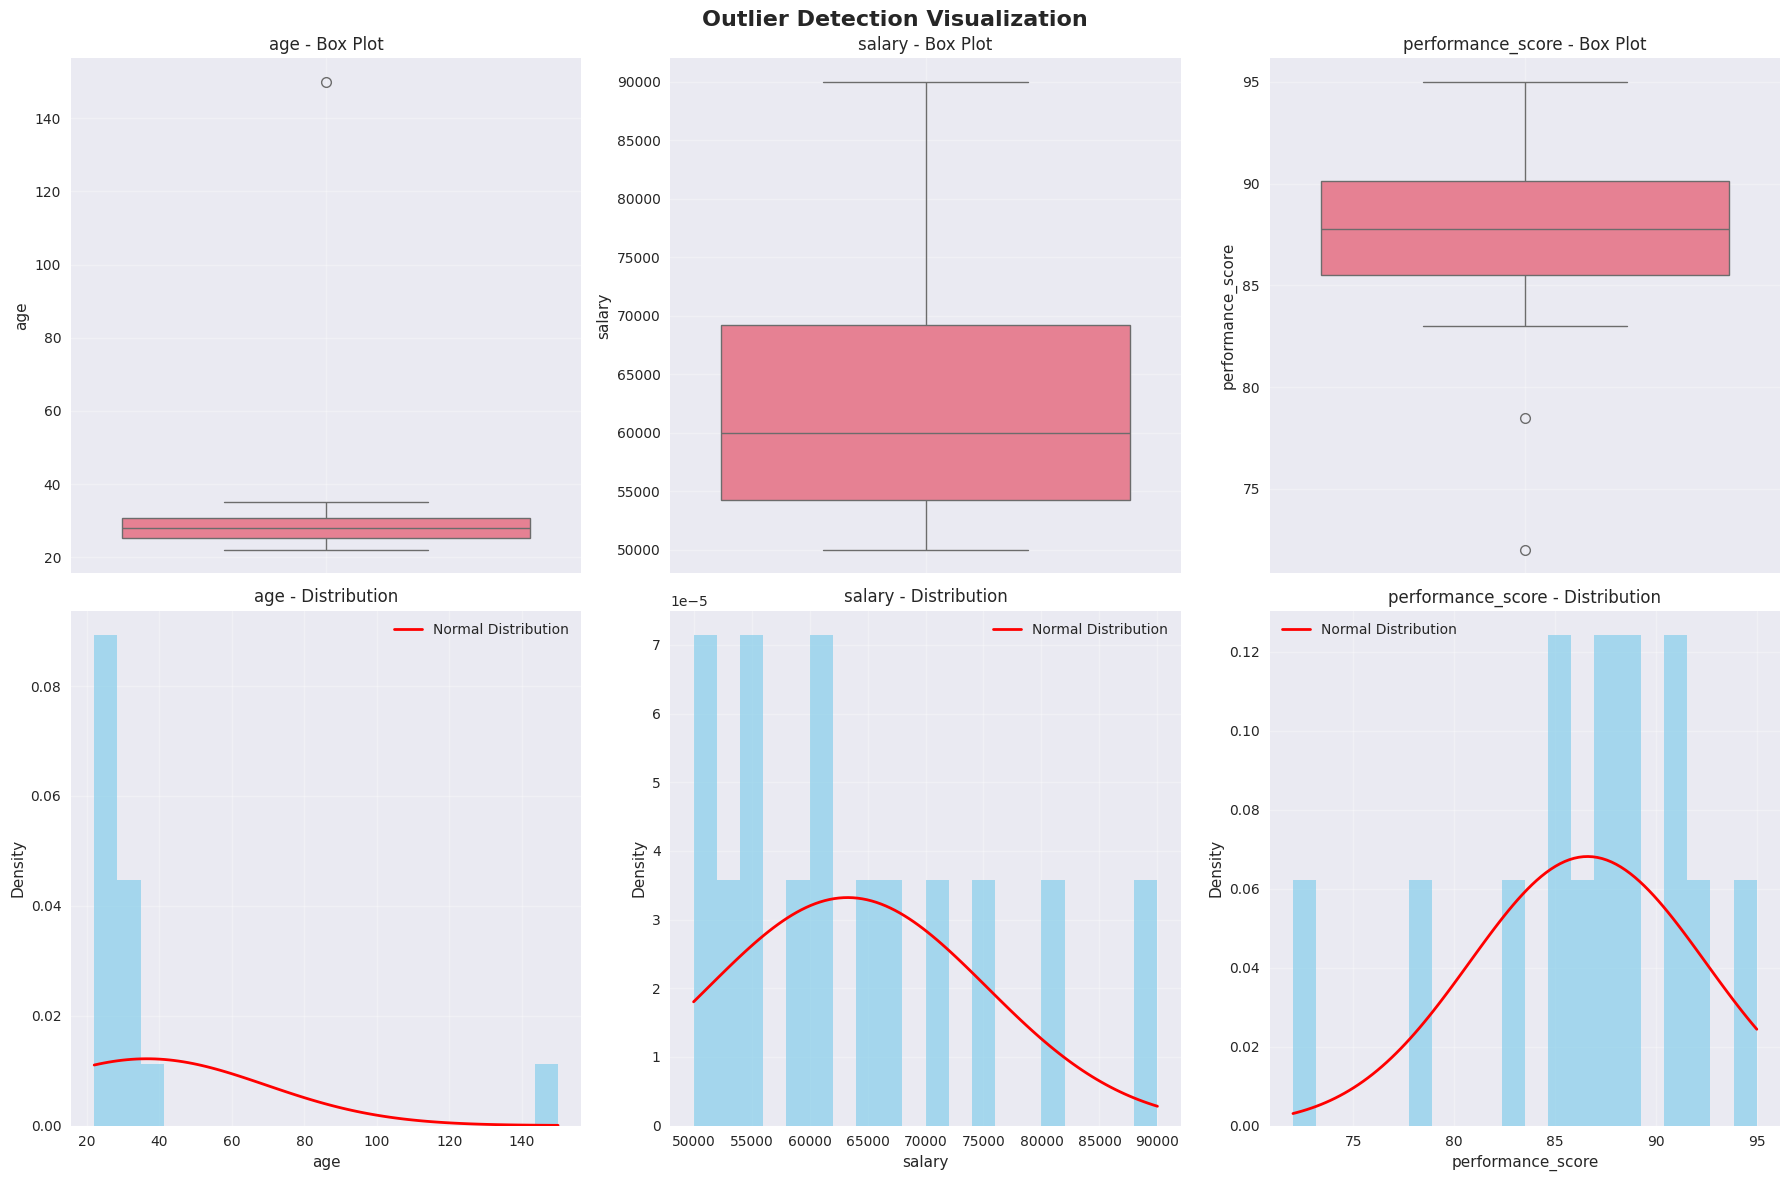

3️⃣ OUTLIER TREATMENT STRATEGIES
-----------------------------------
Original dataset shape: (14, 25)
After removing outliers: (13, 25)

Winsorization (capping at 5th and 95th percentiles):

age:
  Before: min=22.00, max=150.00
  After:  min=23.30, max=75.25

salary:
  Before: min=50000.00, max=90000.00
  After:  min=50000.00, max=83500.00

performance_score:
  Before: min=72.00, max=95.00
  After:  min=76.22, max=93.05

Log transformation (for right-skewed data):

salary:
  Original range: 50000.00 to 90000.00
  Original skewness: 0.930
  Log-transformed skewness: 0.624

📊 TREATMENT COMPARISON
-------------------------
Age column comparison across treatments:
       Original  Outliers Removed  Outliers Capped
count     14.00             13.00            14.00
mean      36.57             27.85            31.32
std       32.83              3.58            13.06
min       22.00             22.00            23.30
25%       25.25             25.00            25.25
50%       28.00          

In [31]:
# Outlier detection and treatment
df_outliers = df_text.copy()

print("🎯 OUTLIER DETECTION METHODS")
print("=" * 40)

# Focus on numerical columns
numerical_columns = ['age', 'salary', 'performance_score']

# 1. STATISTICAL METHODS
print("1️⃣ STATISTICAL OUTLIER DETECTION")
print("-" * 35)

def detect_outliers_iqr(data, column):
    """Detect outliers using Interquartile Range (IQR) method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    outliers = data[z_scores > threshold]
    
    return outliers, z_scores

# Apply IQR method
print("IQR Method Results:")
for col in numerical_columns:
    outliers_iqr, lower, upper = detect_outliers_iqr(df_outliers, col)
    print(f"\n{col}:")
    print(f"  Valid range: {lower:.2f} to {upper:.2f}")
    print(f"  Outliers found: {len(outliers_iqr)}")
    
    if len(outliers_iqr) > 0:
        print(f"  Outlier values: {outliers_iqr[col].tolist()}")

# Apply Z-score method
print("\n\nZ-Score Method Results (threshold=3):")
for col in numerical_columns:
    outliers_z, z_scores = detect_outliers_zscore(df_outliers, col, threshold=3)
    print(f"\n{col}:")
    print(f"  Outliers found: {len(outliers_z)}")
    
    if len(outliers_z) > 0:
        print(f"  Outlier values: {outliers_z[col].tolist()}")

# 2. VISUALIZATION OF OUTLIERS
print("\n2️⃣ OUTLIER VISUALIZATION")
print("-" * 25)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection Visualization', fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_columns):
    # Box plot
    ax1 = axes[0, i]
    sns.boxplot(data=df_outliers, y=col, ax=ax1)
    ax1.set_title(f'{col} - Box Plot')
    ax1.grid(True, alpha=0.3)
    
    # Histogram with normal distribution overlay
    ax2 = axes[1, i]
    ax2.hist(df_outliers[col].dropna(), bins=20, density=True, alpha=0.7, color='skyblue')
    
    # Overlay normal distribution
    mu, sigma = df_outliers[col].mean(), df_outliers[col].std()
    x = np.linspace(df_outliers[col].min(), df_outliers[col].max(), 100)
    normal_dist = stats.norm.pdf(x, mu, sigma)
    ax2.plot(x, normal_dist, 'r-', linewidth=2, label='Normal Distribution')
    
    ax2.set_title(f'{col} - Distribution')
    ax2.set_xlabel(col)
    ax2.set_ylabel('Density')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. OUTLIER TREATMENT STRATEGIES
print("3️⃣ OUTLIER TREATMENT STRATEGIES")
print("-" * 35)

# Strategy 1: Remove outliers
df_no_outliers = df_outliers.copy()
print(f"Original dataset shape: {df_no_outliers.shape}")

for col in numerical_columns:
    outliers_iqr, lower, upper = detect_outliers_iqr(df_no_outliers, col)
    # Remove outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)]

print(f"After removing outliers: {df_no_outliers.shape}")

# Strategy 2: Cap outliers (Winsorization)
df_capped = df_outliers.copy()

def cap_outliers(data, column, percentile_range=(5, 95)):
    """Cap outliers at specified percentiles"""
    lower_percentile = np.percentile(data[column].dropna(), percentile_range[0])
    upper_percentile = np.percentile(data[column].dropna(), percentile_range[1])
    
    data[column] = np.clip(data[column], lower_percentile, upper_percentile)
    return data

print("\nWinsorization (capping at 5th and 95th percentiles):")
for col in numerical_columns:
    print(f"\n{col}:")
    print(f"  Before: min={df_capped[col].min():.2f}, max={df_capped[col].max():.2f}")
    df_capped = cap_outliers(df_capped, col, percentile_range=(5, 95))
    print(f"  After:  min={df_capped[col].min():.2f}, max={df_capped[col].max():.2f}")

# Strategy 3: Transform outliers
df_transformed = df_outliers.copy()

print("\nLog transformation (for right-skewed data):")
for col in ['salary']:  # Apply to salary which might be right-skewed
    print(f"\n{col}:")
    print(f"  Original range: {df_transformed[col].min():.2f} to {df_transformed[col].max():.2f}")
    print(f"  Original skewness: {df_transformed[col].skew():.3f}")
    
    # Apply log transformation
    df_transformed[f'{col}_log'] = np.log1p(df_transformed[col])  # log1p handles values close to 0
    print(f"  Log-transformed skewness: {df_transformed[f'{col}_log'].skew():.3f}")

# Compare the effect of different treatments
print("\n📊 TREATMENT COMPARISON")
print("-" * 25)

treatments = {
    'Original': df_outliers['age'].describe(),
    'Outliers Removed': df_no_outliers['age'].describe(),
    'Outliers Capped': df_capped['age'].describe()
}

comparison_df = pd.DataFrame(treatments).round(2)
print("Age column comparison across treatments:")
print(comparison_df)


# 8. Data Transformation Techniques 🔄

## Scaling, Encoding, and Feature Engineering

Transform your data to make it suitable for machine learning algorithms and statistical analysis.


🔄 DATA TRANSFORMATION TECHNIQUES
1️⃣ SCALING AND NORMALIZATION
-----------------------------------
Original data statistics:
         age    salary  performance_score
count  14.00     14.00              14.00
mean   31.32  62821.43              86.77
std    13.06  10985.32               4.89
min    23.30  50000.00              76.22
25%    25.25  54250.00              85.50
50%    28.00  60000.00              87.75
75%    30.75  69250.00              90.12
max    75.25  83500.00              93.05

After Standard Scaling (mean=0, std=1):
       age_standard  salary_standard  performance_score_standard
count         14.00            14.00                       14.00
mean           0.00            -0.00                       -0.00
std            1.04             1.04                        1.04
min           -0.64            -1.21                       -2.24
25%           -0.48            -0.81                       -0.27
50%           -0.26            -0.27                        0.21
7

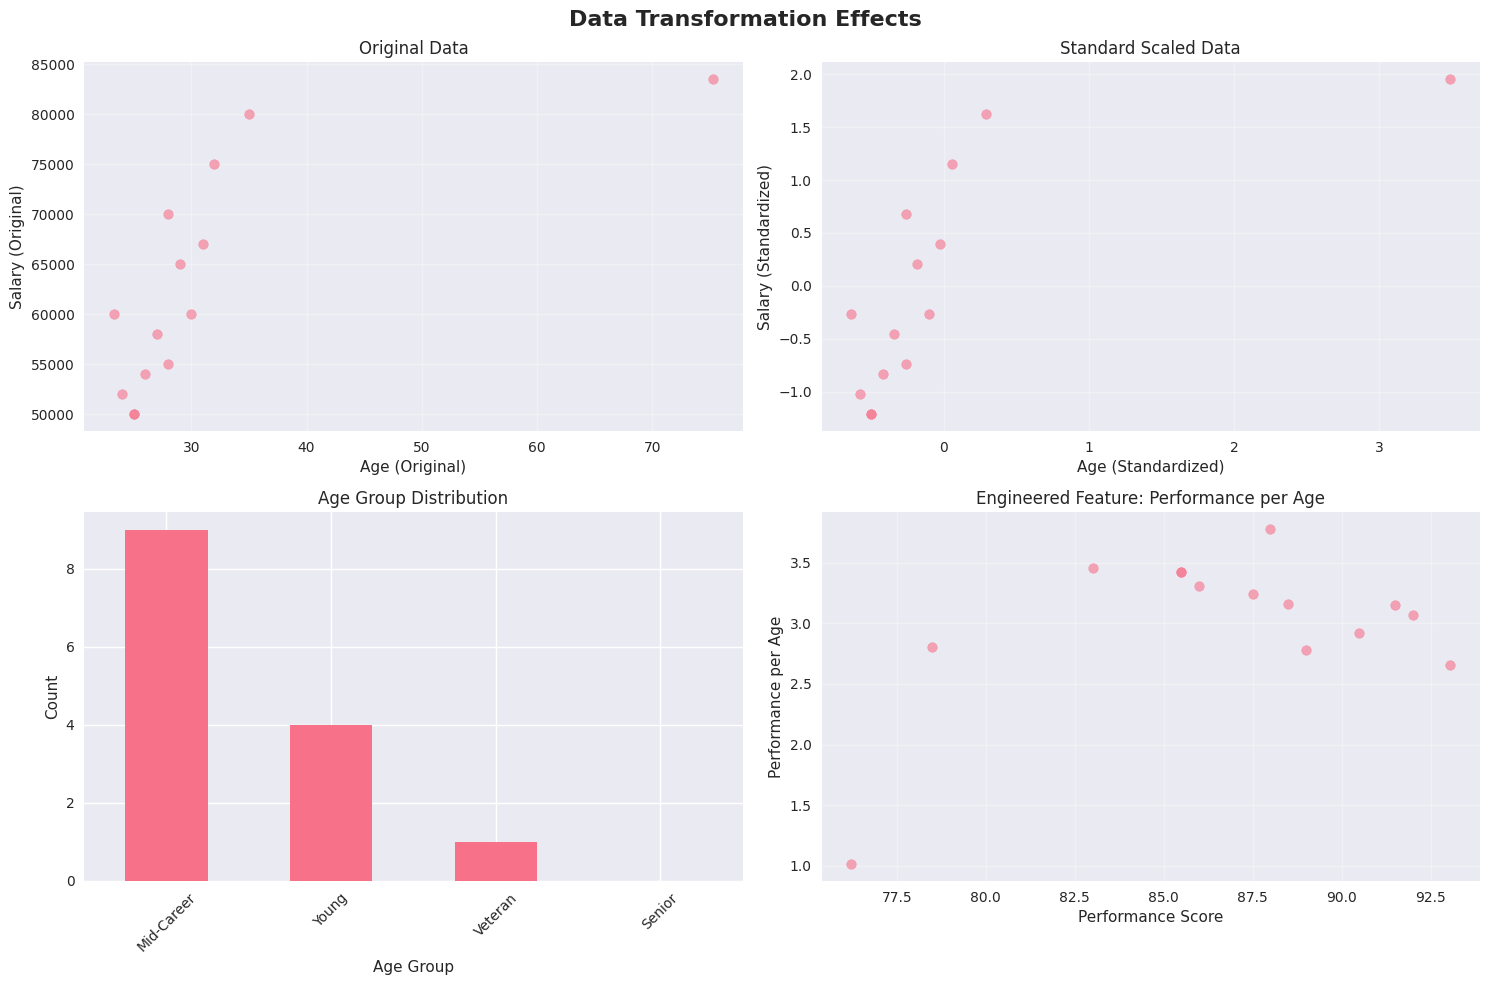


✅ Data transformation completed!
Original features: 25
After feature engineering: 33
New features added: 8


In [33]:
# Data transformation techniques
df_transform = df_capped.copy()  # Use the dataset with capped outliers

print("🔄 DATA TRANSFORMATION TECHNIQUES")
print("=" * 45)

# 1. SCALING AND NORMALIZATION
print("1️⃣ SCALING AND NORMALIZATION")
print("-" * 35)

# Prepare numerical data for scaling
scaling_columns = ['age', 'salary', 'performance_score']
scaling_data = df_transform[scaling_columns].copy()

print("Original data statistics:")
print(scaling_data.describe().round(2))

# Standard Scaling (Z-score normalization)
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(scaling_data)
df_standard_scaled = pd.DataFrame(scaled_standard, columns=[f'{col}_standard' for col in scaling_columns])

print("\nAfter Standard Scaling (mean=0, std=1):")
print(df_standard_scaled.describe().round(2))

# Min-Max Scaling (normalization to 0-1 range)
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(scaling_data)
df_minmax_scaled = pd.DataFrame(scaled_minmax, columns=[f'{col}_minmax' for col in scaling_columns])

print("\nAfter Min-Max Scaling (range 0-1):")
print(df_minmax_scaled.describe().round(2))

# Robust Scaling (using median and IQR)
from sklearn.preprocessing import RobustScaler
scaler_robust = RobustScaler()
scaled_robust = scaler_robust.fit_transform(scaling_data)
df_robust_scaled = pd.DataFrame(scaled_robust, columns=[f'{col}_robust' for col in scaling_columns])

print("\nAfter Robust Scaling (median=0, IQR=1):")
print(df_robust_scaled.describe().round(2))

# 2. FEATURE ENGINEERING
print("\n2️⃣ FEATURE ENGINEERING")
print("-" * 25)

# Create new features from existing data
df_features = df_transform.copy()

# Age groups (binning)
df_features['age_group'] = pd.cut(df_features['age'], 
                                 bins=[0, 25, 35, 45, 100], 
                                 labels=['Young', 'Mid-Career', 'Senior', 'Veteran'])

# Salary categories
df_features['salary_category'] = pd.cut(df_features['salary'], 
                                       bins=[0, 50000, 70000, 90000, float('inf')], 
                                       labels=['Entry', 'Mid', 'Senior', 'Executive'])

# Performance vs Age ratio
df_features['performance_per_age'] = df_features['performance_score'] / df_features['age']

# Salary per performance point
df_features['salary_per_performance'] = df_features['salary'] / df_features['performance_score']

# Department size (frequency encoding)
dept_counts = df_features['department'].value_counts()
df_features['department_size'] = df_features['department'].map(dept_counts)

print("New engineered features:")
new_features = ['age_group', 'salary_category', 'performance_per_age', 
                'salary_per_performance', 'department_size']
print(df_features[new_features].head())

# 3. POLYNOMIAL FEATURES
print("\n3️⃣ POLYNOMIAL FEATURES")
print("-" * 25)

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
age_salary_data = df_features[['age', 'salary']].copy()

# Generate polynomial features
poly_transformed = poly_features.fit_transform(age_salary_data)
poly_feature_names = poly_features.get_feature_names_out(['age', 'salary'])

df_poly = pd.DataFrame(poly_transformed, columns=poly_feature_names)
print("Polynomial features (degree 2):")
print(df_poly.head())

# 4. INTERACTION FEATURES
print("\n4️⃣ INTERACTION FEATURES")
print("-" * 25)

# Create interaction features manually
df_features['age_salary_interaction'] = df_features['age'] * df_features['salary']
df_features['age_performance_interaction'] = df_features['age'] * df_features['performance_score']

# Boolean interactions
df_features['high_performer_senior'] = ((df_features['performance_score'] > 90) & 
                                       (df_features['age'] > 35)).astype(int)

print("Interaction features:")
interaction_features = ['age_salary_interaction', 'age_performance_interaction', 'high_performer_senior']
print(df_features[interaction_features].head())

# 5. VISUALIZATION OF TRANSFORMATIONS
print("\n5️⃣ TRANSFORMATION VISUALIZATION")
print("-" * 35)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Data Transformation Effects', fontsize=16, fontweight='bold')

# Original vs Scaled data
ax1 = axes[0, 0]
ax1.scatter(df_transform['age'], df_transform['salary'], alpha=0.6)
ax1.set_xlabel('Age (Original)')
ax1.set_ylabel('Salary (Original)')
ax1.set_title('Original Data')
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
ax2.scatter(df_standard_scaled['age_standard'], df_standard_scaled['salary_standard'], alpha=0.6)
ax2.set_xlabel('Age (Standardized)')
ax2.set_ylabel('Salary (Standardized)')
ax2.set_title('Standard Scaled Data')
ax2.grid(True, alpha=0.3)

# Feature distributions
ax3 = axes[1, 0]
df_features['age_group'].value_counts().plot(kind='bar', ax=ax3)
ax3.set_title('Age Group Distribution')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Count')
ax3.tick_params(axis='x', rotation=45)

ax4 = axes[1, 1]
ax4.scatter(df_features['performance_score'], df_features['performance_per_age'], alpha=0.6)
ax4.set_xlabel('Performance Score')
ax4.set_ylabel('Performance per Age')
ax4.set_title('Engineered Feature: Performance per Age')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Data transformation completed!")
print(f"Original features: {len(df_transform.columns)}")
print(f"After feature engineering: {len(df_features.columns)}")
print(f"New features added: {len(df_features.columns) - len(df_transform.columns)}")


# 9. Data Cleaning Pipeline 🔧

## Putting It All Together

Let's create a comprehensive, reusable data cleaning pipeline that incorporates all the techniques we've learned.


In [34]:
class DataCleaningPipeline:
    """
    A comprehensive data cleaning pipeline that applies multiple cleaning techniques
    """
    
    def __init__(self, config=None):
        """
        Initialize the pipeline with configuration parameters
        
        Parameters:
        config (dict): Configuration dictionary with cleaning parameters
        """
        self.config = config or self._default_config()
        self.cleaning_report = {}
        
    def _default_config(self):
        """Default configuration for the cleaning pipeline"""
        return {
            'handle_missing': True,
            'missing_strategy': 'median',  # 'mean', 'median', 'mode', 'drop', 'knn'
            'handle_duplicates': True,
            'duplicate_subset': None,  # Columns to check for duplicates
            'handle_outliers': True,
            'outlier_method': 'iqr',  # 'iqr', 'zscore', 'cap'
            'standardize_text': True,
            'validate_data_types': True,
            'create_features': False,
            'scaling_method': None,  # 'standard', 'minmax', 'robust'
            'verbose': True
        }
    
    def clean_data(self, df):
        """
        Main method to clean the DataFrame
        
        Parameters:
        df (pd.DataFrame): Input DataFrame to clean
        
        Returns:
        pd.DataFrame: Cleaned DataFrame
        dict: Cleaning report with statistics
        """
        if self.config['verbose']:
            print("🧹 STARTING DATA CLEANING PIPELINE")
            print("=" * 50)
            print(f"Original dataset shape: {df.shape}")
        
        # Create a copy to avoid modifying original data
        df_clean = df.copy()
        
        # Initialize cleaning report
        self.cleaning_report = {
            'original_shape': df.shape,
            'steps': []
        }
        
        # Step 1: Handle missing values
        if self.config['handle_missing']:
            df_clean = self._handle_missing_values(df_clean)
        
        # Step 2: Handle duplicates
        if self.config['handle_duplicates']:
            df_clean = self._handle_duplicates(df_clean)
        
        # Step 3: Standardize text data
        if self.config['standardize_text']:
            df_clean = self._standardize_text(df_clean)
        
        # Step 4: Validate and convert data types
        if self.config['validate_data_types']:
            df_clean = self._validate_data_types(df_clean)
        
        # Step 5: Handle outliers
        if self.config['handle_outliers']:
            df_clean = self._handle_outliers(df_clean)
        
        # Step 6: Create features (optional)
        if self.config['create_features']:
            df_clean = self._create_features(df_clean)
        
        # Step 7: Apply scaling (optional)
        if self.config['scaling_method']:
            df_clean = self._apply_scaling(df_clean)
        
        # Finalize report
        self.cleaning_report['final_shape'] = df_clean.shape
        self.cleaning_report['rows_removed'] = df.shape[0] - df_clean.shape[0]
        self.cleaning_report['columns_added'] = df_clean.shape[1] - df.shape[1]
        
        if self.config['verbose']:
            self._print_final_report()
        
        return df_clean, self.cleaning_report
    
    def _handle_missing_values(self, df):
        """Handle missing values based on the configured strategy"""
        if self.config['verbose']:
            print("\n1️⃣ Handling Missing Values")
            print("-" * 30)
        
        missing_before = df.isnull().sum().sum()
        
        if self.config['missing_strategy'] == 'drop':
            df = df.dropna()
        else:
            # Handle numerical columns
            numerical_cols = df.select_dtypes(include=[np.number]).columns
            for col in numerical_cols:
                if df[col].isnull().sum() > 0:
                    if self.config['missing_strategy'] == 'mean':
                        df[col].fillna(df[col].mean(), inplace=True)
                    elif self.config['missing_strategy'] == 'median':
                        df[col].fillna(df[col].median(), inplace=True)
                    elif self.config['missing_strategy'] == 'knn':
                        # Simple KNN imputation for numerical data
                        from sklearn.impute import KNNImputer
                        imputer = KNNImputer(n_neighbors=3)
                        df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
            
            # Handle categorical columns
            categorical_cols = df.select_dtypes(include=['object']).columns
            for col in categorical_cols:
                if df[col].isnull().sum() > 0:
                    mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else 'Unknown'
                    df[col].fillna(mode_val, inplace=True)
        
        missing_after = df.isnull().sum().sum()
        
        step_report = {
            'step': 'Missing Values',
            'missing_before': missing_before,
            'missing_after': missing_after,
            'strategy': self.config['missing_strategy']
        }
        self.cleaning_report['steps'].append(step_report)
        
        if self.config['verbose']:
            print(f"Missing values before: {missing_before}")
            print(f"Missing values after: {missing_after}")
        
        return df
    
    def _handle_duplicates(self, df):
        """Remove duplicate rows"""
        if self.config['verbose']:
            print("\n2️⃣ Handling Duplicates")
            print("-" * 25)
        
        duplicates_before = df.duplicated().sum()
        
        if self.config['duplicate_subset']:
            df = df.drop_duplicates(subset=self.config['duplicate_subset'], keep='first')
        else:
            df = df.drop_duplicates(keep='first')
        
        duplicates_after = df.duplicated().sum()
        
        step_report = {
            'step': 'Duplicates',
            'duplicates_before': duplicates_before,
            'duplicates_after': duplicates_after,
            'subset': self.config['duplicate_subset']
        }
        self.cleaning_report['steps'].append(step_report)
        
        if self.config['verbose']:
            print(f"Duplicate rows before: {duplicates_before}")
            print(f"Duplicate rows after: {duplicates_after}")
        
        return df
    
    def _standardize_text(self, df):
        """Standardize text columns"""
        if self.config['verbose']:
            print("\n3️⃣ Standardizing Text")
            print("-" * 25)
        
        text_cols = df.select_dtypes(include=['object']).columns
        
        for col in text_cols:
            if col in df.columns:
                # Convert to string and handle NaN
                df[col] = df[col].astype(str)
                
                # Basic text cleaning
                df[col] = df[col].str.strip()  # Remove leading/trailing whitespace
                df[col] = df[col].str.replace(r'\\s+', ' ', regex=True)  # Multiple spaces
                
                # Check if it looks like a name or categorical field
                if 'name' in col.lower():
                    df[col] = df[col].str.title()
                elif df[col].nunique() / len(df) < 0.5:  # Likely categorical
                    df[col] = df[col].str.title()
        
        step_report = {
            'step': 'Text Standardization',
            'columns_processed': list(text_cols)
        }
        self.cleaning_report['steps'].append(step_report)
        
        if self.config['verbose']:
            print(f"Text columns standardized: {list(text_cols)}")
        
        return df
    
    def _validate_data_types(self, df):
        """Validate and convert data types"""
        if self.config['verbose']:
            print("\n4️⃣ Validating Data Types")
            print("-" * 28)
        
        conversions = {}
        
        for col in df.columns:
            original_dtype = df[col].dtype
            
            # Try to convert object columns to numeric if possible
            if df[col].dtype == 'object':
                # Try numeric conversion
                numeric_converted = pd.to_numeric(df[col], errors='coerce')
                if not numeric_converted.isna().all():
                    # If most values can be converted to numeric
                    na_ratio = numeric_converted.isna().sum() / len(df)
                    if na_ratio < 0.1:  # Less than 10% would become NaN
                        df[col] = numeric_converted
                        conversions[col] = f"{original_dtype} → {df[col].dtype}"
            
            # Optimize integer types
            elif df[col].dtype in ['int64', 'float64']:
                if df[col].min() >= 0 and df[col].max() <= 255:
                    df[col] = df[col].astype('uint8')
                    conversions[col] = f"{original_dtype} → uint8"
                elif df[col].min() >= -128 and df[col].max() <= 127:
                    df[col] = df[col].astype('int8')
                    conversions[col] = f"{original_dtype} → int8"
        
        step_report = {
            'step': 'Data Type Validation',
            'conversions': conversions
        }
        self.cleaning_report['steps'].append(step_report)
        
        if self.config['verbose'] and conversions:
            print("Data type conversions:")
            for col, conversion in conversions.items():
                print(f"  {col}: {conversion}")
        
        return df
    
    def _handle_outliers(self, df):
        """Handle outliers in numerical columns"""
        if self.config['verbose']:
            print("\n5️⃣ Handling Outliers")
            print("-" * 22)
        
        numerical_cols = df.select_dtypes(include=[np.number]).columns
        outliers_handled = {}
        
        for col in numerical_cols:
            if self.config['outlier_method'] == 'iqr':
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
                
                if outliers_before > 0:
                    # Cap outliers
                    df[col] = np.clip(df[col], lower_bound, upper_bound)
                    outliers_handled[col] = outliers_before
        
        step_report = {
            'step': 'Outlier Handling',
            'method': self.config['outlier_method'],
            'outliers_handled': outliers_handled
        }
        self.cleaning_report['steps'].append(step_report)
        
        if self.config['verbose'] and outliers_handled:
            print("Outliers handled:")
            for col, count in outliers_handled.items():
                print(f"  {col}: {count} outliers capped")
        
        return df
    
    def _create_features(self, df):
        """Create basic engineered features"""
        if self.config['verbose']:
            print("\n6️⃣ Creating Features")
            print("-" * 22)
        
        # This is a basic implementation - can be extended
        features_created = []
        
        # Example: Create age groups if age column exists
        if 'age' in df.columns:
            df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 100], 
                                   labels=['Young', 'Adult', 'Middle', 'Senior'])
            features_created.append('age_group')
        
        step_report = {
            'step': 'Feature Creation',
            'features_created': features_created
        }
        self.cleaning_report['steps'].append(step_report)
        
        if self.config['verbose'] and features_created:
            print(f"Features created: {features_created}")
        
        return df
    
    def _apply_scaling(self, df):
        """Apply scaling to numerical columns"""
        if self.config['verbose']:
            print(f"\n7️⃣ Applying {self.config['scaling_method'].title()} Scaling")
            print("-" * 30)
        
        numerical_cols = df.select_dtypes(include=[np.number]).columns
        
        if self.config['scaling_method'] == 'standard':
            scaler = StandardScaler()
        elif self.config['scaling_method'] == 'minmax':
            scaler = MinMaxScaler()
        elif self.config['scaling_method'] == 'robust':
            from sklearn.preprocessing import RobustScaler
            scaler = RobustScaler()
        
        if len(numerical_cols) > 0:
            scaled_data = scaler.fit_transform(df[numerical_cols])
            df[numerical_cols] = scaled_data
        
        step_report = {
            'step': 'Scaling',
            'method': self.config['scaling_method'],
            'columns_scaled': list(numerical_cols)
        }
        self.cleaning_report['steps'].append(step_report)
        
        if self.config['verbose']:
            print(f"Columns scaled: {list(numerical_cols)}")
        
        return df
    
    def _print_final_report(self):
        """Print final cleaning report"""
        print("\n📊 CLEANING PIPELINE SUMMARY")
        print("=" * 40)
        print(f"Original shape: {self.cleaning_report['original_shape']}")
        print(f"Final shape: {self.cleaning_report['final_shape']}")
        print(f"Rows removed: {self.cleaning_report['rows_removed']}")
        print(f"Columns added: {self.cleaning_report['columns_added']}")
        print("\nSteps completed:")
        for i, step in enumerate(self.cleaning_report['steps'], 1):
            print(f"  {i}. {step['step']}")

# Test the pipeline with our messy dataset
print("🚀 TESTING THE DATA CLEANING PIPELINE")
print("=" * 50)

# Configure the pipeline
pipeline_config = {
    'handle_missing': True,
    'missing_strategy': 'median',
    'handle_duplicates': True,
    'duplicate_subset': ['name', 'email'],
    'handle_outliers': True,
    'outlier_method': 'iqr',
    'standardize_text': True,
    'validate_data_types': True,
    'create_features': True,
    'scaling_method': None,  # Don't scale for this example
    'verbose': True
}

# Create and run the pipeline
pipeline = DataCleaningPipeline(config=pipeline_config)
df_final, report = pipeline.clean_data(df_messy)

print("\n🎉 PIPELINE COMPLETED!")
print(f"Check the df_final variable for your cleaned dataset.")
print(f"Check the report variable for detailed cleaning statistics.")


🚀 TESTING THE DATA CLEANING PIPELINE
🧹 STARTING DATA CLEANING PIPELINE
Original dataset shape: (15, 8)

1️⃣ Handling Missing Values
------------------------------
Missing values before: 5
Missing values after: 0

2️⃣ Handling Duplicates
-------------------------
Duplicate rows before: 0
Duplicate rows after: 0

3️⃣ Standardizing Text
-------------------------
Text columns standardized: ['name', 'email', 'department', 'join_date']

4️⃣ Validating Data Types
----------------------------
Data type conversions:
  customer_id: int64 → uint8
  age: float64 → uint8
  performance_score: float64 → uint8

5️⃣ Handling Outliers
----------------------
Outliers handled:
  age: 1 outliers capped
  performance_score: 1 outliers capped

6️⃣ Creating Features
----------------------
Features created: ['age_group']

📊 CLEANING PIPELINE SUMMARY
Original shape: (15, 8)
Final shape: (14, 9)
Rows removed: 1
Columns added: 1

Steps completed:
  1. Missing Values
  2. Duplicates
  3. Text Standardization
  4. 